In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
sys.path.append('../')
import os
import curvedsky as cs
from tqdm import tqdm
import pickle as pl
import seaborn as sns
from scipy.stats import mode
from scipy.stats import gaussian_kde

In [2]:
%load_ext autoreload
%autoreload 2
from quest import Reconstruction
from plotstat import recStat,crazymix

In [3]:
rec1 = Reconstruction.from_ini('LB_FG0.ini')
rec2 = Reconstruction.from_ini('LB_FG1.ini')
rec3 = Reconstruction.from_ini('LB_FG2.ini')

DATABASE: loaded
SIMUALATION object with out FG: Loaded
FILTERING object with out FG: Loaded
QUEST object with out FG: Loaded
DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded
DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded


In [3]:
fname = '../Data/alens.pkl'
if os.path.isfile(fname):
    Alens1,Alens2,Alens3 = pl.load(open(fname,'rb'))
else:
    Alens1,Alens2,Alens3 = [],[],[]
    for i in tqdm(range(400),desc='Alens',unit='sim'):
        Alens1.append(np.mean(crazymix(rec3,rec3,i).get_samples(False).reshape(-1)))
        Alens2.append(np.mean(crazymix(rec3,rec2,i).get_samples(False).reshape(-1)))
        Alens3.append(np.mean(crazymix(rec3,rec1,i).get_samples(False).reshape(-1)))    
    Alens1 = np.array(Alens1)
    Alens2 = np.array(Alens2)
    Alens3 = np.array(Alens3)
    pl.dump((Alens1,Alens2,Alens3),open('alens.pkl','wb'))

In [8]:
def plot_alens(Alens1, Alens2, Alens3,alpha_bar=0.5,binsize=20,xlabel=None,ylabel=None):
    def normalize_kde(data):
        kde = gaussian_kde(data, bw_method=.5)
        x = np.linspace(min(data)-.03, max(data)+.03, 1000)
        y = kde(x)
        return x, y / max(y)
    x1, y1 = normalize_kde(Alens1)
    x2, y2 = normalize_kde(Alens2)
    x3, y3 = normalize_kde(Alens3)
    bins1, hist1 = np.histogram(Alens1, bins=binsize, density=True)
    bins2, hist2 = np.histogram(Alens2, bins=binsize, density=True)
    bins3, hist3 = np.histogram(Alens3, bins=binsize, density=True)

    plt.figure(figsize=(12, 8))
    plt.plot(x1, y1, color='blue', label='s1d1')
    plt.plot(x2, y2, color='green', label='s0d0')
    plt.plot(x3, y3, color='red', label='No FG')
    plt.bar(hist1[:-1], bins1/max(bins1), width=hist1[1]-hist1[0], alpha=alpha_bar, color='blue',edgecolor='white')
    plt.bar(hist2[:-1], bins2/max(bins2), width=hist2[1]-hist2[0], alpha=alpha_bar, color='green',edgecolor='white')
    plt.bar(hist3[:-1], bins3/max(bins3), width=hist3[1]-hist3[0], alpha=alpha_bar, color='red',edgecolor='white')
    plt.axvline(np.mean(Alens1),ymax=.9, color='blue', linestyle='dashed', linewidth=1.5)
    plt.axvline(np.mean(Alens2),ymax=.9, color='green', linestyle='dashed', linewidth=1.5)
    plt.axvline(np.mean(Alens3),ymax=.9, color='red', linestyle='dashed', linewidth=1.5)
    plt.text(np.mean(Alens1), 1, f'{np.mean(Alens1):.2f}', color='blue', ha='center', va='bottom', fontsize=15)
    plt.text(np.mean(Alens2), 1, f'{np.mean(Alens2):.2f}', color='green', ha='center', va='bottom', fontsize=15)
    plt.text(np.mean(Alens3), 1, f'{np.mean(Alens3):.2f}', color='red', ha='center', va='bottom', fontsize=15)
    plt.ylim(0, 1.1)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.legend(loc='lower center', bbox_to_anchor=(0.6, 0.4), fontsize=15)
    plt.tick_params(left = False, labelleft = False)
    plt.grid(False)
    plt.xticks(fontsize=15)


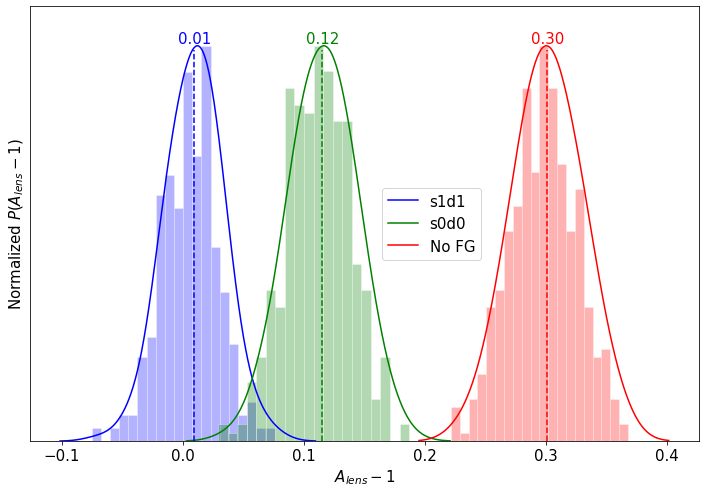

In [9]:
plot_alens(Alens1-1, Alens2-1, Alens3-1,alpha_bar=0.3,xlabel='$A_{lens} - 1$',ylabel='Normalized $P(A_{lens} - 1)$')